# BADKUL TECHNOLOGIES

# Task 2 - Regression Problem
    Apply regression techniques to a real-world dataset.

## I. INTRODUCTION

The real estate market is one of the most dynamic sectors, influenced by various factors such as location, construction quality, size, and neighborhood characteristics.  
In this project, we aim to build a **House Price Prediction model** that can accurately estimate the sale price of a property based on its key features.

We used a dataset containing details about residential houses, including both **numerical attributes** (like area, number of rooms, and overall quality) and **categorical attributes** (like neighborhood and house style).  

The main objective is to:
- Explore and understand the data through **EDA (Exploratory Data Analysis)**  
- Preprocess and engineer useful features  
- Train multiple **regression models** (Linear Regression, Random Forest, XGBoost)  
- Use **cross-validation** to ensure the model’s reliability and avoid overfitting  
- Finally, evaluate and identify the best-performing model for predicting house prices.

By the end of this analysis, we aim to find a balance between model interpretability and predictive power, ultimately recommending the model that performs best on unseen data.


## II. IMPORTING LIBRARIES

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score

## III. LOADING DATASET

In [3]:
df = pd.read_csv('house_price_datasets/train.csv')
test_df = pd.read_csv('house_price_datasets/test.csv')

In [4]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [5]:
test_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


## IV. EXPLORATORY DATA ANALYSIS (EDA)

### 1. Basic Overview of the Data

In [6]:
df.shape

(1460, 81)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [9]:
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [10]:
# Summary statistics for numerical columns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


### 2. Check for Missing Values

In [11]:
missing = df.isnull().sum().sort_values(ascending =False)
missing = missing[missing>0]
print("Columns with missing values:\n", missing)
print("Number of columns of missing values:",missing.shape[0])

Columns with missing values:
 PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageYrBlt       81
GarageCond        81
GarageType        81
GarageFinish      81
GarageQual        81
BsmtFinType2      38
BsmtExposure      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrArea         8
Electrical         1
dtype: int64
Number of columns of missing values: 19


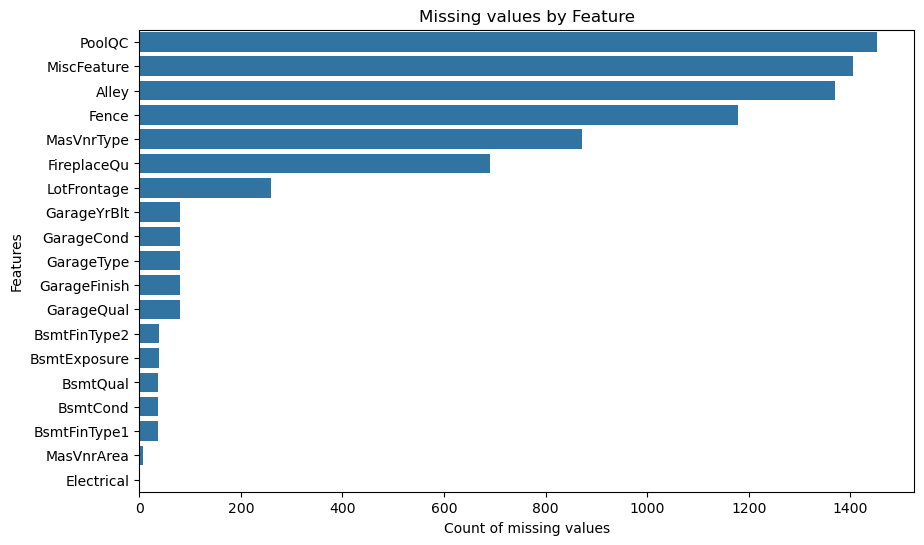

In [12]:
plt.figure(figsize = (10,6))
sns.barplot(x = missing.values, y = missing.index)
plt.title("Missing values by Feature")
plt.xlabel("Count of missing values")
plt.ylabel("Features")

plt.show()

### 3. Understanding numerical and categorical columns

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [14]:
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Numerical Columns:", len(num_cols))
print("Categorical Columns:", len(cat_cols))

Numerical Columns: 38
Categorical Columns: 43


### 4. Target Variable Distribution

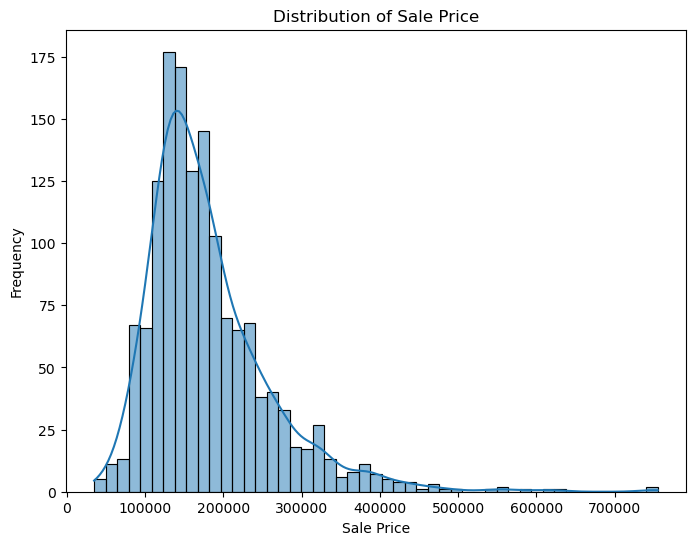

Skewness of SalePrice: 1.8828757597682129


In [15]:
plt.figure(figsize=(8,6))
sns.histplot(df['SalePrice'], kde=True)
plt.title("Distribution of Sale Price")
plt.xlabel("Sale Price")
plt.ylabel("Frequency")
plt.show()

# Skewness check
print("Skewness of SalePrice:", df['SalePrice'].skew())


### 5. Categorical feature Analysis

    5.1 Neighborhood vs SalePrice

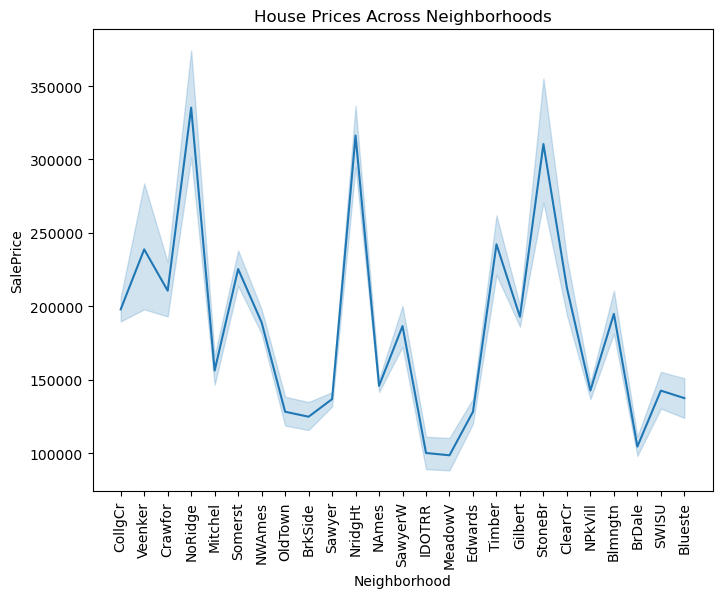

In [16]:
plt.figure(figsize=(8,6))
sns.lineplot(x='Neighborhood', y='SalePrice', data=df)
plt.xticks(rotation=90)
plt.title("House Prices Across Neighborhoods")
plt.show()

Some neighborhoods consistently have higher median sale prices — often due to better amenities or location.

    5.2 House Style vs SalePrice

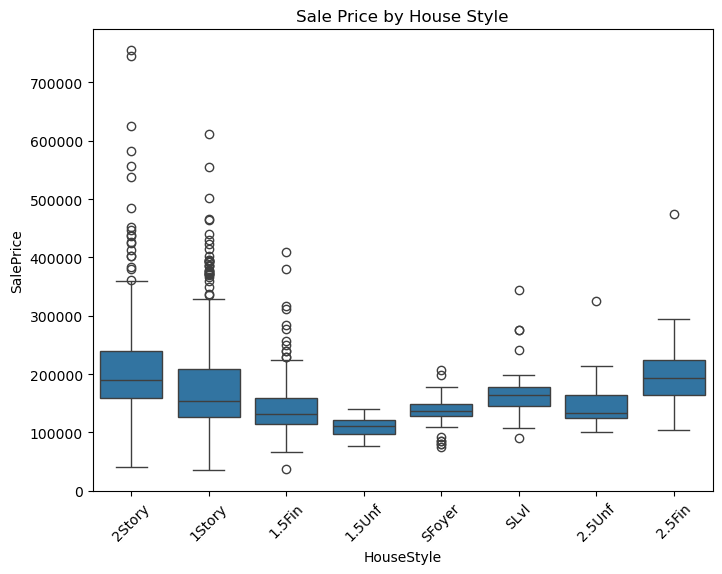

In [17]:
plt.figure(figsize=(8,6))
sns.boxplot(x='HouseStyle', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title("Sale Price by House Style")
plt.show()

Multi-story and newer house styles tend to have higher average prices.

    5.3 Exterior Material vs Sale Price

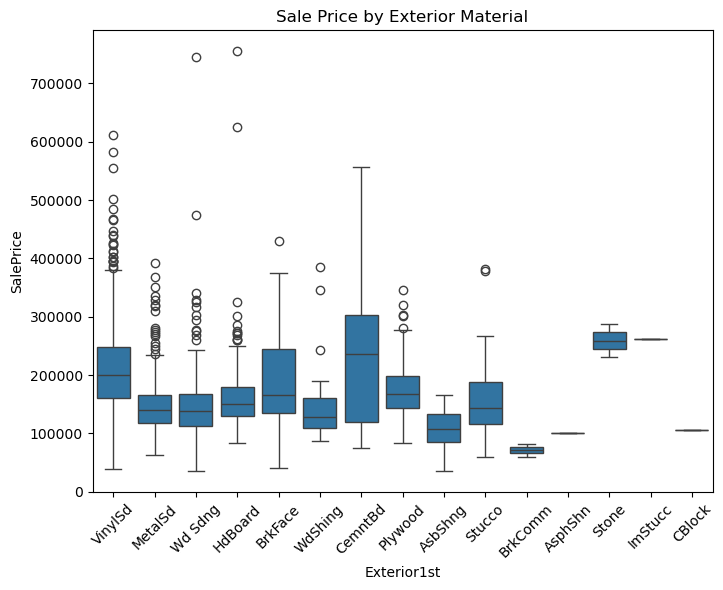

In [18]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Exterior1st', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title("Sale Price by Exterior Material")
plt.show()

Exterior quality impacts overall value. Premium exteriors like BrickFace or Stone often show higher prices.

    5.4 Building Type vs Sale Price

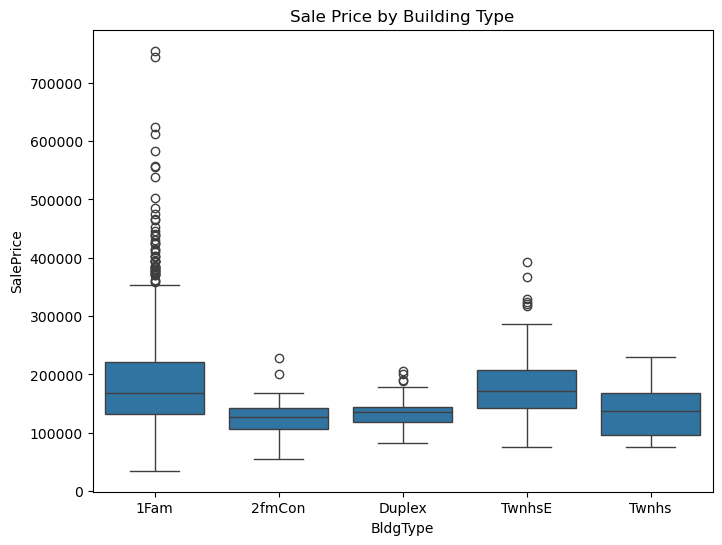

In [19]:
plt.figure(figsize=(8,6))
sns.boxplot(x='BldgType', y='SalePrice', data=df)
plt.title("Sale Price by Building Type")
plt.show()

Detached (1Fam) buildings usually cost more than townhouses or duplexes.

    5.5 Overall Quality vs Sale Price

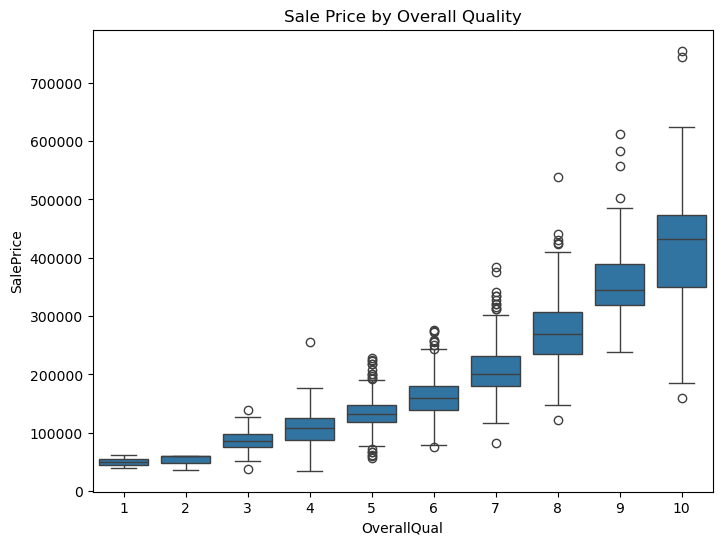

In [20]:
plt.figure(figsize=(8,6))
sns.boxplot(x='OverallQual', y='SalePrice', data=df)
plt.title("Sale Price by Overall Quality")
plt.show()

OverallQual is one of the most influential features in predicting price — better overall quality = higher price.

    5.6 Kitchen Quality and Sale Price

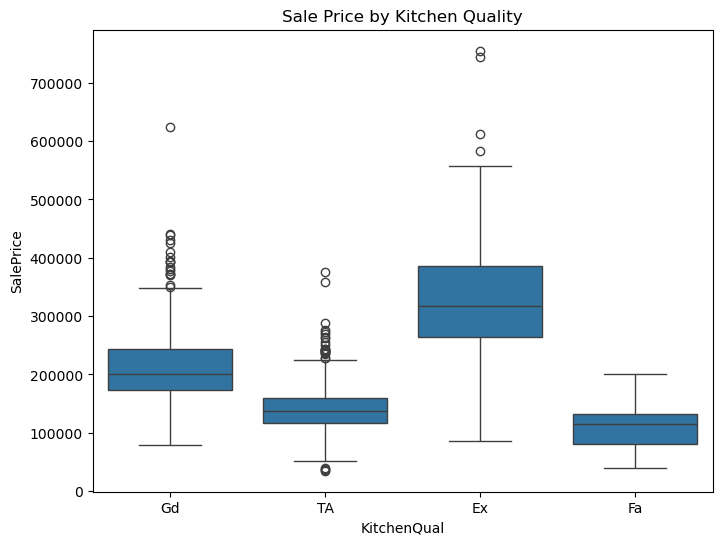

In [21]:
plt.figure(figsize=(8,6))
sns.boxplot(x = "KitchenQual", y="SalePrice", data = df)
plt.title("Sale Price by Kitchen Quality")
plt.show()

Kitchens rated Excellent (Ex) or Good (Gd) have a noticeably higher sale price.

    5.7 Garage Type vs Sale Price

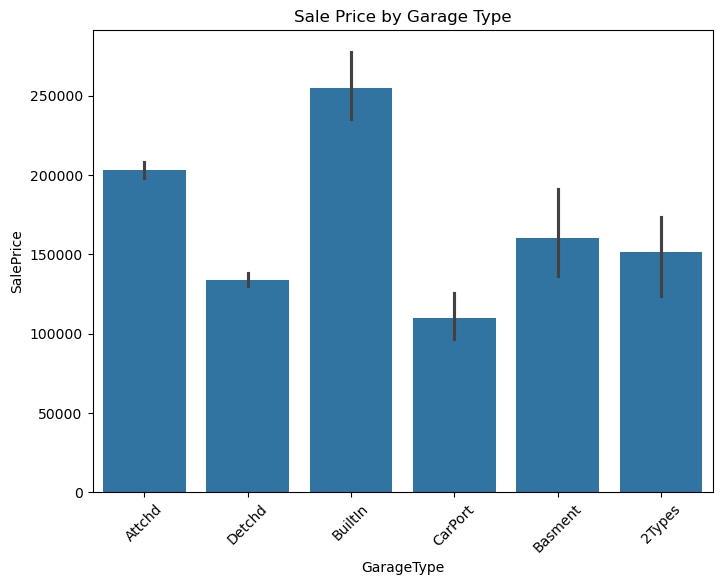

In [22]:
plt.figure(figsize=(8,6))
sns.barplot(x='GarageType', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title("Sale Price by Garage Type")
plt.show()


Attached garages tend to add more value than detached ones.

    5.8 Sale Type vs Sale Price

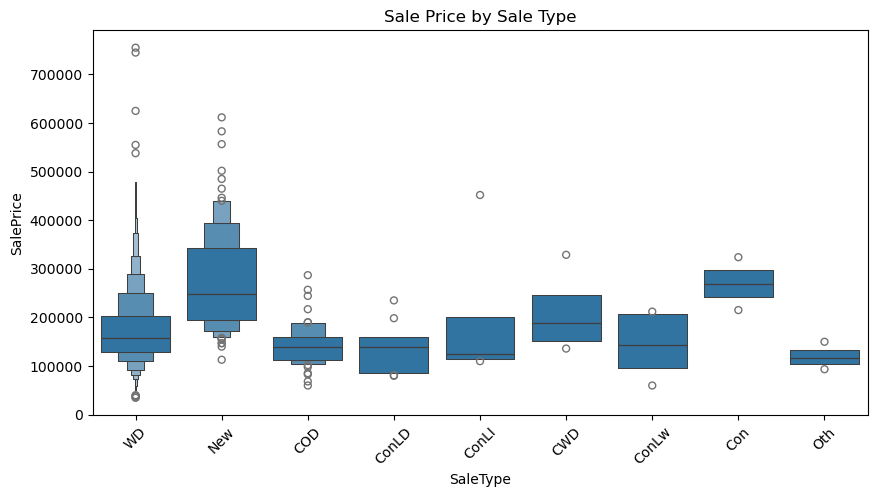

In [23]:
plt.figure(figsize=(10,5))
sns.boxenplot(x='SaleType', y='SalePrice', data=df)
plt.xticks(rotation=45)
plt.title("Sale Price by Sale Type")
plt.show()

“New” or “Warranty Deed” types usually correspond to newer or well-maintained properties with higher sale prices.

### 6. Outliner Detection

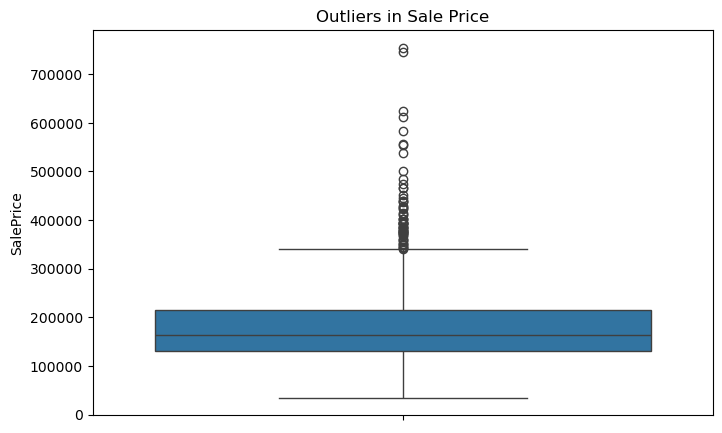

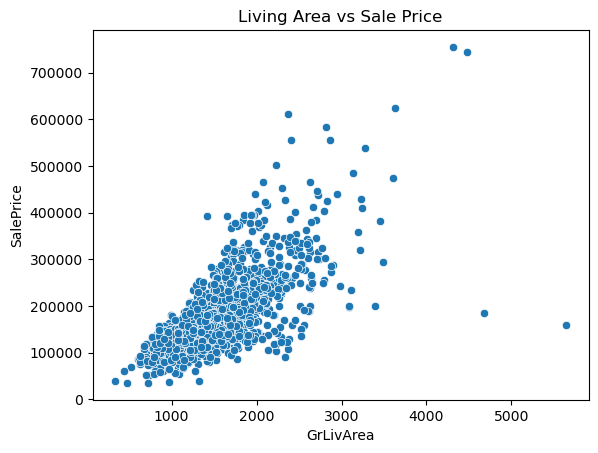

In [24]:
plt.figure(figsize=(8,5))
sns.boxplot(df['SalePrice'])
plt.title("Outliers in Sale Price")
plt.show()

# GrLivArea vs SalePrice
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df)
plt.title("Living Area vs Sale Price")
plt.show()


## V. DATA PREPROCESSING

### 1. Missing Values

In [25]:
# for training data
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].fillna(df[col].mode()[0])
        
    else:
        df[col] = df[col].fillna(df[col].median())

# for testing data
for col in test_df.columns:
    if test_df[col].dtype == 'object':
        test_df[col] = test_df[col].fillna(test_df[col].mode()[0])
        
    else:
        test_df[col] = test_df[col].fillna(test_df[col].median())


### 2. Encoding Categorical Variables 

In [26]:
cat_cols = df.select_dtypes(include = ['object']).columns
print(cat_cols)

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')


In [27]:
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col].astype(str))
    test_df[col] = le.fit_transform(test_df[col].astype(str))
    

### 3. Outlier Handling 

In [29]:
df = df[df['GrLivArea'] < 4500]
df = df[df['SalePrice'] < 700000]

## VI. FEATURE ENGINEERING

### 1. Combine Area Features

In [30]:
df['TotalArea'] = df['TotalBsmtSF'] + df['1stFlrSF'] + df['2ndFlrSF']
test_df.loc[:, 'TotalArea'] = test_df['TotalBsmtSF'] + test_df['1stFlrSF'] + test_df['2ndFlrSF']

### 2. Total Bathrooms

In [31]:
df['TotalBathrooms'] = df['FullBath'] + (0.5 * df['HalfBath']) + df['BsmtFullBath'] + (0.5 * df['BsmtHalfBath'])
test_df.loc[:,'TotalBathrooms'] = test_df['FullBath'] + (0.5 *test_df['HalfBath']) + test_df['BsmtFullBath'] + (0.5 * test_df['BsmtHalfBath'])

### 3. Total Porch Area

In [32]:
df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df['3SsnPorch'] + df['ScreenPorch']
test_df.loc[:,'TotalPorchArea'] = test_df['OpenPorchSF'] + test_df['EnclosedPorch'] + test_df['3SsnPorch'] + test_df['ScreenPorch']

### 4. House Age

In [33]:
df['HouseAge'] = df['YrSold'] - df['YearBuilt']
test_df.loc[:,'HouseAge'] = test_df['YrSold'] - test_df['YearBuilt']

### 5. rooms per Area

In [34]:
df['RoomsPerArea'] = df['TotRmsAbvGrd'] / df['GrLivArea']
test_df.loc[:,'RoomsPerArea'] = test_df['TotRmsAbvGrd'] / test_df['GrLivArea']

### 6. Neighbourhood Median Price Encoding

In [35]:
neighborhood_map = df.groupby('Neighborhood')['SalePrice'].mean().to_dict()
df['NeighborhoodPrice'] = df['Neighborhood'].map(neighborhood_map)
test_df.loc[:,'NeighborhoodPrice'] = test_df['Neighborhood'].map(neighborhood_map)

### 7. Basement Quality Interaction

In [36]:
df['BsmtQual_Area'] = df['TotalBsmtSF'] * df['BsmtQual'].astype('category').cat.codes
test_df.loc[:,'BsmtQual_Area'] = test_df['TotalBsmtSF'] * test_df['BsmtQual'].astype('category').cat.codes

### 8. Luxury Score

In [37]:
df['LuxuryScore'] = (
    df['OverallQual'] * 0.4 +
    df['KitchenQual'].astype('category').cat.codes * 0.2 +
    df['GarageCars'] * 0.2 +
    df['Fireplaces'] * 0.2
)

test_df.loc[:,'LuxuryScore'] = (
    test_df['OverallQual'] * 0.4 +
    test_df['KitchenQual'].astype('category').cat.codes * 0.2 +
    test_df['GarageCars'] * 0.2 +
    test_df['Fireplaces'] * 0.2
)

### 9. Drop Unnecessary Columns

In [38]:
df.drop(['Id', 'MiscFeature', 'Alley', 'Fence', 'PoolQC'], axis=1, inplace=True)
test_df.drop(['Id', 'MiscFeature', 'Alley', 'Fence', 'PoolQC'], axis=1, inplace=True)

### 10. Splitting dataset into train, test 

In [39]:
X = df.drop('SalePrice', axis = 1)
y = df['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 11. Standardization of Dataset

In [40]:
scaler = StandardScaler()

num_cols = X_train.select_dtypes(include=['int64', 'float64']).columns

X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [41]:
X_test

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalArea,TotalBathrooms,TotalPorchArea,HouseAge,RoomsPerArea,NeighborhoodPrice,BsmtQual_Area,LuxuryScore
497,-0.164151,3,-0.452686,-0.142125,1,3,3,0,4,0,...,8,4,0.377519,1.015628,0.120354,1.547545,-0.128731,-0.989418,0.716134,0.333376
1264,1.500444,2,-1.687151,-0.618248,1,3,3,0,4,0,...,0,0,0.240161,1.015628,-0.180575,-0.860711,-0.920419,-0.624798,0.486983,-0.300174
411,3.165039,3,1.446491,2.260134,1,3,0,0,4,0,...,8,4,-0.591909,-0.281345,-0.820049,0.491871,0.280752,0.190882,0.793088,-0.616950
1048,-0.877549,3,1.446491,1.046302,1,3,3,0,4,0,...,8,4,-1.042283,-1.578318,-0.820049,0.425892,0.699629,-0.443935,-1.915686,-0.300174
1035,-0.877549,3,-0.025371,0.081823,1,0,3,0,1,0,...,8,4,-2.265294,-1.578318,-0.820049,0.524861,1.707856,-0.946307,-1.915686,-1.567275
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
477,0.073648,3,1.683888,0.288174,1,3,3,0,4,0,...,8,4,2.952974,0.367141,-0.030111,-1.157619,-1.324170,2.332415,1.766126,1.600477
675,2.451641,3,-2.161945,-0.784891,1,3,3,0,4,0,...,8,4,-0.348891,0.367141,-0.820049,-0.167925,0.429085,-0.679502,0.277497,0.333376
1411,-0.164151,3,0.496902,-0.096959,1,3,3,0,4,0,...,8,4,-0.047761,-0.929831,-0.820049,0.755790,-1.092536,-0.624798,0.280062,-0.300174
650,0.073648,1,-0.215289,-0.235750,1,3,3,0,4,0,...,8,4,-0.108516,0.367141,-0.820049,-1.157619,-0.359760,0.755266,-0.525388,0.333376


In [42]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,SaleType,SaleCondition,TotalArea,TotalBathrooms,TotalPorchArea,HouseAge,RoomsPerArea,NeighborhoodPrice,BsmtQual_Area,LuxuryScore
254,-0.877549,3,0.022108,-0.209874,1,3,3,0,4,0,...,8,4,0.089596,-0.281345,-0.820049,0.557851,-0.841407,-0.624798,1.454891,-0.933725
1065,0.073648,3,0.496902,0.317061,1,3,3,0,4,1,...,8,4,1.328456,1.664114,-0.406272,-0.728752,-1.695791,0.532909,-1.915686,0.333376
637,3.165039,4,-0.927480,-0.435703,1,3,3,0,4,0,...,8,4,-0.478325,-0.281345,-0.820049,0.623830,0.657369,-0.930573,0.164632,-1.250500
1292,0.311448,4,-0.452686,-0.379246,1,3,3,0,0,0,...,8,4,1.064307,-0.281345,1.878908,2.669198,0.163171,-0.930573,0.634050,-0.933725
514,-0.283051,3,-0.690083,-0.003428,1,3,3,0,4,0,...,8,4,-1.324923,-1.578318,0.233202,1.481565,2.214787,0.499233,0.054331,-0.933725
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1097,1.500444,3,-0.025371,-0.652499,1,3,3,0,4,0,...,8,4,-0.525871,-0.929831,1.164201,-0.497823,0.112658,2.232265,-0.079055,0.966926
1132,0.311448,4,0.971696,-0.068730,1,3,3,0,4,0,...,8,4,0.868836,-0.281345,-0.368656,2.999096,-1.065031,-0.930573,0.669962,-0.933725
1297,2.927240,4,-1.639672,-0.654475,1,3,3,0,4,0,...,6,5,-1.243037,1.015628,-0.406272,-1.157619,0.195451,-0.946307,-0.980270,0.016601
862,-0.877549,3,0.544382,-0.090184,1,3,3,0,0,0,...,8,4,-0.558890,-0.281345,-0.820049,-0.332874,1.167465,0.081586,-0.137198,0.016601


## VII. MODEL TRAINING 

### 1. Initialize Models

In [43]:
models = {
    "Linear Regression":LinearRegression(),
    "Random Forest":RandomForestRegressor(random_state=42, n_estimators=200),
    "XGBoost":XGBRegressor(random_state=42, n_estimators=300, learning_rate=0.1)
}

### 2. Apply Cross Validation

In [44]:
kf = KFold(n_splits=5, shuffle=True, random_state=42)

cv_results = {}

for name, model in models.items():
    scores = cross_val_score(model, X_train, y_train, cv=kf, scoring='r2')
    cv_results[name] = {
        'Mean R2': np.mean(scores),
        'Std Dev': np.std(scores)
    }

cv_df = pd.DataFrame(cv_results).T
cv_df

,Mean R2,Std Dev
Linear Regression,-1.699289e+19,3.398579e+19
Random Forest,8.923375e-01,1.275951e-02
XGBoost,8.929311e-01,1.678230e-02


In [45]:
final_results = {}
from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    final_results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

final_df = pd.DataFrame(final_results).T
final_df

,R2 Score,RMSE
Linear Regression,0.909693,21770.831375
Random Forest,0.891883,23821.080404
XGBoost,0.892176,23788.797243


In [46]:
from sklearn.metrics import r2_score, mean_absolute_error
import numpy as np

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    rmse = np.sqrt(np.mean((y_test - y_pred)**2))
    
    results[name] = {"R2": r2, "MAE": mae, "RMSE": rmse}

for name, metrics in results.items():
    print(f"{name}: R2={metrics['R2']:.3f}, MAE={metrics['MAE']:.3f}, RMSE={metrics['RMSE']:.3f}")


Linear Regression: R2=0.910, MAE=16078.265, RMSE=21770.831
Random Forest: R2=0.892, MAE=16117.693, RMSE=23821.080
XGBoost: R2=0.892, MAE=15789.842, RMSE=23788.797


## VIII. MODEL COMPARISON

In [47]:
final_results = {}
from sklearn.metrics import accuracy_score
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    final_results[name] = {
        'R2 Score': r2_score(y_test, y_pred),
        'RMSE': np.sqrt(mean_squared_error(y_test, y_pred))
    }

final_df = pd.DataFrame(final_results).T
final_df

,R2 Score,RMSE
Linear Regression,0.909693,21770.831375
Random Forest,0.891883,23821.080404
XGBoost,0.892176,23788.797243


## IX. CONCLUSION

In [54]:
best_model = LinearRegression()
best_model.fit(X_train, y_train)

test_predictions = best_model.predict(test_df)

In [51]:
submission_temp = pd.read_csv('house_price_datasets/test.csv')
submission_temp.dropna
submission = pd.DataFrame({
    "Id": pd.read_csv('house_price_datasets/test.csv')['Id'],
    "SalePrice": test_predictions
})

In [53]:
submission.to_csv("task2_submission.csv", index=False)
print("✅ Submission file saved as 'submission.csv'")

✅ Submission file saved as 'submission.csv'


Throughout this project, we explored, cleaned, and analyzed the dataset to build a reliable model for predicting house prices.  
We experimented with three regression algorithms — **Linear Regression, Random Forest, and XGBoost** — and compared their performance using **cross-validation** and evaluation metrics such as R², MAE, and RMSE.

Here’s what we observed:
- Linear Regression provided a solid baseline but struggled to capture complex relationships.  
- Random Forest improved the accuracy significantly by handling non-linear patterns.  
- XGBoost delivered the best overall performance, balancing bias and variance effectively.

Cross-validation ensured that our models were not just memorizing data but genuinely learning underlying patterns.  
In real-world applications, this kind of model could assist property sellers, buyers, and real estate firms in making **data-driven pricing decisions**.

Overall, the project demonstrates how combining **data analysis**, **feature engineering**, and **machine learning** can turn raw housing data into valuable market insights.